# Imports

**Import libraries**

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.decomposition import PCA
try:
  import geopandas as gpd
except:
  !pip install geopandas
  import geopandas as gpd
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

     |████████████████████████████████| 1.0MB 33.5MB/s 
     |████████████████████████████████| 15.3MB 229kB/s 
     |████████████████████████████████| 6.6MB 37.3MB/s 
Mounted at /content/drive


**File location**

In [ ]:
root_path = "drive/MyDrive/ML_project"
#root_path = "drive/Sharedwithme/ML_project"
orig = root_path + "/original_db"
clean = root_path + "/clean_db"
GIS = orig + "/GIS"
os.listdir(orig)

['carac_viv.csv',
 'carac_soc.csv',
 'conjunto_de_datos_tb_sec_iii_endireh_2016.csv',
 'rel_pareja_1.csv',
 'rel_pareja_2.csv',
 'toma_dec.csv',
 'roles.csv',
 'TB_SEC_III.dbf',
 'GIS',
 'Documentación INEGI',
 'conjunto_de_datos_tb_sec_vii_2_endireh_2016.csv',
 'economico_mujer.csv',
 'confianza.csv',
 'rol_genero.csv']

**Import data**

In [ ]:
data_base = pd.read_pickle(clean + "/MASTER_ENDIREH2016.pkl")

**Check for missings**

In [ ]:
'''
cols = []
# Drop columns that have more than 30% of missing values
for col in data_base.columns:
  if data_base[col].isnull().sum()/len(data_base) < 0.3:
    cols.append(col)

df = data_base[cols]
'''
percent_missing = data_base.isnull().sum() * 100 / len(data_base)
missing_value_df = pd.DataFrame({'column_name': data_base.columns, 'percent_missing': percent_missing})
missing_value_df = missing_value_df.reset_index(drop = True).sort_values('percent_missing')
missings = missing_value_df[missing_value_df["percent_missing"]>0]
missings_90 = missing_value_df[missing_value_df["percent_missing"]>90]
print('there are', len(missings), 'variables with missing values')
print(len(missings_90), 'have over 90% missings')

there are 7 variables with missing values
0 have over 90% missings


In [ ]:
print(missings)

                  column_name  percent_missing
102                    p_edad         9.273214
101                 p_trabaja         9.273214
104                  dif_edad         9.273214
99   p_licenciatura_terminada         9.273214
98          p_prepa_terminada         9.273214
97            p_sec_terminada         9.273214
100                p_indigena         9.273214


**Describing target variables**

In [ ]:
data_base[data_base.filter(regex='^tot_violent',axis=1).columns].describe(percentiles = [.25, .5, .75, .80, .85, .90, .95, .99])

,tot_violent,tot_violent_phys,tot_violent_psych,tot_violent_sex,tot_violent_econ,tot_violent_few,tot_violent_few_phys,tot_violent_few_psych,tot_violent_few_sex,tot_violent_few_econ,tot_violent_many,tot_violent_many_phys,tot_violent_many_psych,tot_violent_many_sex,tot_violent_many_econ
count,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000,72855.000000
mean,2.030334,0.408483,1.160538,0.085691,0.375623,1.660229,0.275287,0.984435,0.072583,0.327925,0.597447,0.092156,0.344287,0.030828,0.130176
std,4.251404,1.133180,2.312210,0.471466,0.968856,3.787894,0.942865,2.102966,0.433932,0.906177,2.240716,0.567018,1.252166,0.281930,0.572489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,3.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
85%,4.000000,1.000000,3.000000,0.000000,1.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,7.000000,2.000000,4.000000,0.000000,1.000000,5.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
data_base[['tot_violent', 'tot_violent_few', 'tot_violent_many']].corr()
#Note how similar is tot_violent from tot_violent_few

,tot_violent,tot_violent_few,tot_violent_many
tot_violent,1.000000,0.972492,0.782044
tot_violent_few,0.972492,1.000000,0.824242
tot_violent_many,0.782044,0.824242,1.000000


# Figures for target variable

In [ ]:
sns.set_palette("pastel")

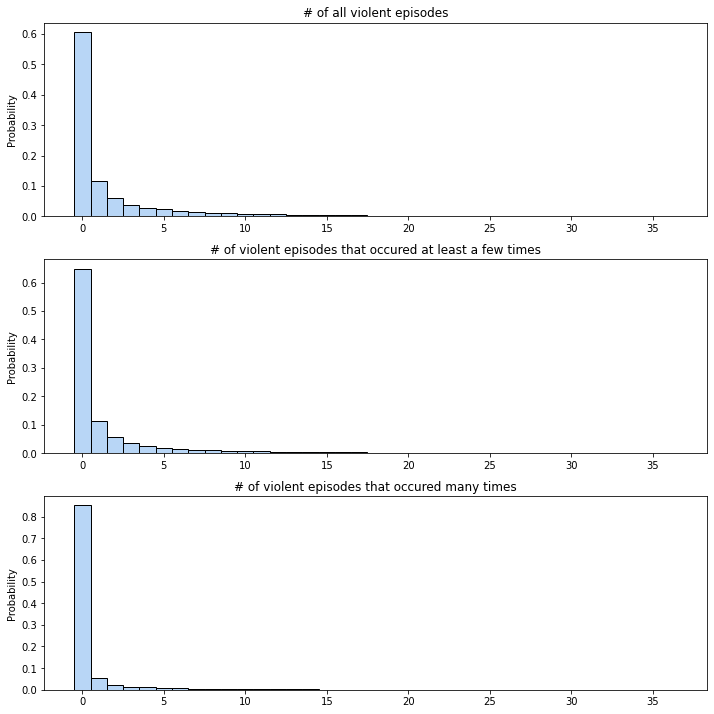

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(data=data_base, x="tot_violent", stat = "probability", discrete = True, ax = ax1)
ax1.set_title('# of all violent episodes')
ax1.set(xlabel='')
sns.histplot(data=data_base, x="tot_violent_few", stat = "probability", discrete = True, ax = ax2)
ax2.set_title('# of violent episodes that occured at least a few times')
ax2.set(xlabel='')
sns.histplot(data=data_base, x="tot_violent_many", stat = "probability", discrete = True, ax = ax3)
ax3.set_title('# of violent episodes that occured many times')
ax3.set(xlabel='')
fig.tight_layout(pad=1.0)

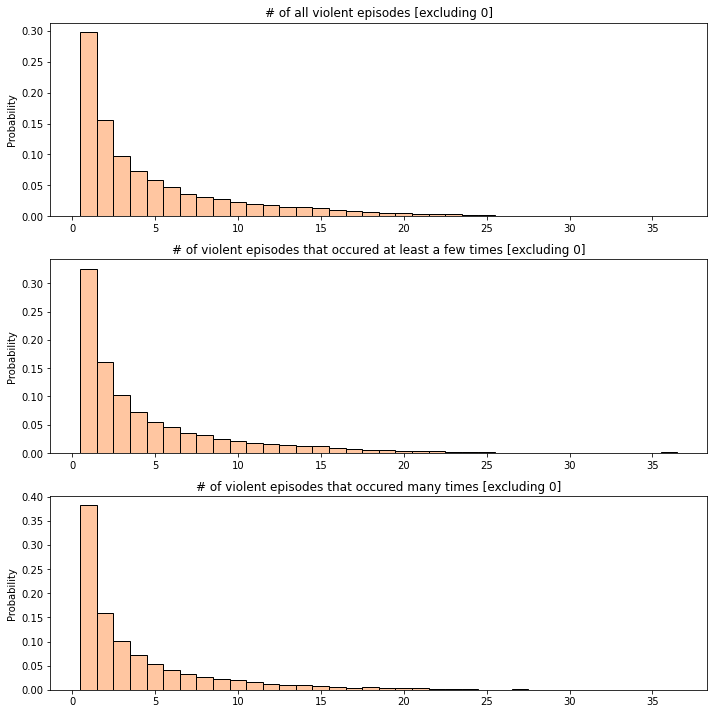

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(data=data_base[data_base["tot_violent"] != 0], x="tot_violent", stat = "probability", discrete = True,
             ax = ax1, color=sns.color_palette("pastel")[1])
ax1.set_title('# of all violent episodes [excluding 0]')
ax1.set(xlabel='')
sns.histplot(data=data_base[data_base["tot_violent_few"] != 0], x="tot_violent_few", stat = "probability", discrete = True,
             ax = ax2, color=sns.color_palette("pastel")[1])
ax2.set_title('# of violent episodes that occured at least a few times [excluding 0]')
ax2.set(xlabel='')
sns.histplot(data=data_base[data_base["tot_violent_many"] != 0], x="tot_violent_many", stat = "probability", discrete = True,
             ax = ax3, color=sns.color_palette("pastel")[1])
ax3.set_title('# of violent episodes that occured many times [excluding 0]')
ax3.set(xlabel='')
fig.tight_layout(pad=1.0)

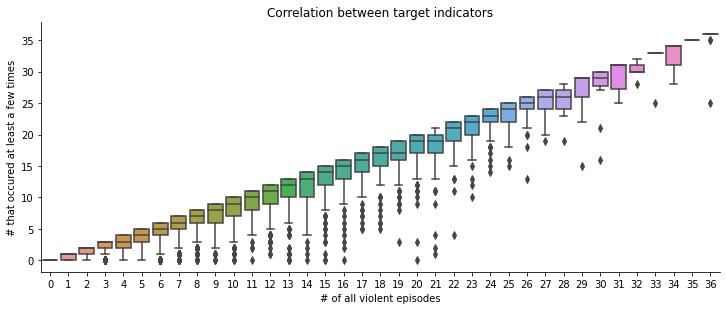

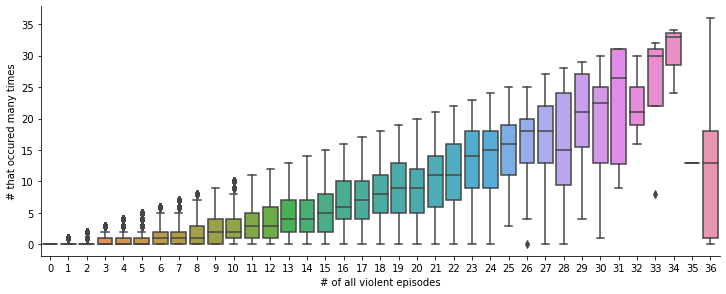

In [ ]:
ax1 = sns.catplot(x="tot_violent", y="tot_violent_few", kind="box", dodge=False, data=data_base,
            height=4, aspect=10/4)
ax1.set(xlabel='# of all violent episodes', ylabel='# that occured at least a few times',
        title = "Correlation between target indicators")
ax2 = sns.catplot(x="tot_violent", y="tot_violent_many", kind="box", dodge=False, data=data_base,
            height=4, aspect=10/4)
ax2.set(xlabel='# of all violent episodes', ylabel='# that occured many times')
#Consistent with the correlations shown above, the first and the third indicator are a lot less correlated than 
#the first and second.

## Violence vs Income

In [ ]:
#Let's make more simple categories of violence
warnings.filterwarnings("ignore")
data_base['tot_violent_cat'] = "More than 3"
data_base['tot_violent_cat'][data_base["tot_violent"] <= 3] = "1 - 3"
data_base['tot_violent_cat'][data_base["tot_violent"] == 0] = "Zero"
data_base = pd.concat([data_base, pd.get_dummies(data_base['tot_violent_cat'])], axis=1)

The survey does not measure income, so we need to create a proxy. A good proxy to this is usually the asset index proposed by Filmer & Pritchett (2001) using PCA.

In [ ]:
#Gather together the asset data
assets = ['P1_4_1', 'P1_4_1', 'P1_4_2', 'P1_4_3', 'P1_4_4', 'P1_4_5','P1_4_6', 'P1_4_7', 'P1_4_8', 'P1_4_9', 'P1_5', 'P1_6']
assets_cont = ["P1_2", "P1_2_A", "P1_3"]
assets_data = data_base[assets_cont]
for col in assets:
  assets_data = pd.concat([pd.get_dummies(data_base[col]).iloc[:, 1:len(data_base[col])], assets_data], axis = 1)

#Principal Component Analysis
pca = PCA(n_components=1)
pca.fit(assets_data)
data_base['asset_pca'] = pca.fit_transform(assets_data)
print("The first component explains ", pca.explained_variance_ratio_[0] * 100, "% of the variance" )

#Divide into quantiles
inc_labels = ['Low', 'Medium Low', 'Medium High', 'High']
data_base['asset_pca_quant'] = pd.qcut(data_base['asset_pca'], 4, labels=inc_labels)

The first component explains  92.19611911393596 % of the variance


Aggregated violence indicator

In [ ]:
#Group them by income
groupby_temp = data_base[['1 - 3', 'More than 3', 'Zero', "asset_pca_quant"]].groupby("asset_pca_quant").mean()
groupby_temp["index2"] = groupby_temp.index
groupby_temp = pd.melt(groupby_temp, id_vars=['index2'], value_vars=['1 - 3', 'More than 3', 'Zero'])
groupby_temp['value'] = groupby_temp['value']*100 

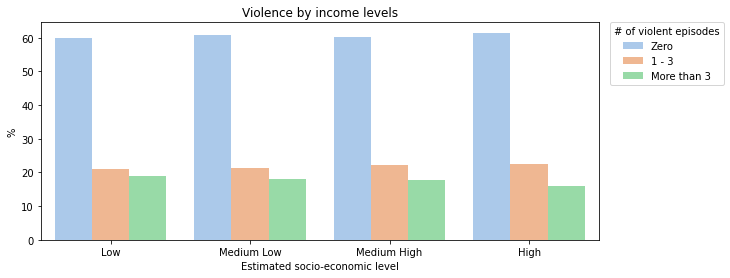

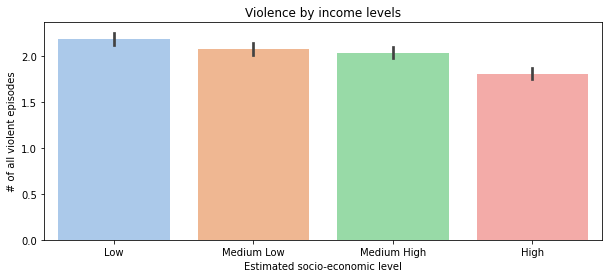

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=groupby_temp, x="index2", y="value", hue="variable", hue_order = ['Zero', '1 - 3', 'More than 3'])
ax.legend(title="# of violent episodes", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(xlabel='Estimated socio-economic level', ylabel='%', title = 'Violence by income levels')
g.set_xticklabels(inc_labels)

fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=data_base, x="asset_pca_quant", y="tot_violent")
ax.set(xlabel='Estimated socio-economic level', ylabel='# of all violent episodes', title = 'Violence by income levels')
g.set_xticklabels(inc_labels)
plt.show()

Individual violence indicators

In [ ]:
#Let's have a more in depht analysis that identifies each violence type. 
phys = ['P13_1_1', 'P13_1_2', 'P13_1_3', 'P13_1_4', 'P13_1_5', 'P13_1_6', 'P13_1_7', 'P13_1_8', 'P13_1_9']
psych = ['P13_1_10', 'P13_1_11', 'P13_1_12', 'P13_1_13', 'P13_1_14', 'P13_1_15', 'P13_1_16', 'P13_1_17', 'P13_1_18', 'P13_1_19', 'P13_1_20', 'P13_1_21', 'P13_1_22', 'P13_1_23AB', 'P13_1_24AB']
sex = ['P13_1_25', 'P13_1_26', 'P13_1_27', 'P13_1_28', 'P13_1_29']
econ = ['P13_1_30', 'P13_1_31', 'P13_1_32', 'P13_1_33AB', 'P13_1_34AB', 'P13_1_35AB', 'P13_1_36AB']
types_violence = [("phys", phys), ("psych", psych), ("sex", sex), ("econ", econ)]

for col in phys + psych + sex + econ:
  data_base[col + "_dum"] = np.where(data_base[col]  <= 3, 1, 0)*100
phys = [x + "_dum" for x in phys]
psych = [x + "_dum" for x in psych]
sex = [x + "_dum" for x in sex]
econ = [x + "_dum" for x in econ]

#List labels
phys_lab  = ['Pushed or pulled hair', 'Slapped', 'Tied-up', 'Kicked', 'Thrown an object', 'Hit with fist or some object', 'Choked', 'Attacked with knife', 'Shot with firearm']
psych_lab = ['Embarrassed, offended, belittled or humiliated', 'Ignored her, not taken into account, not given attention', 'Was told you were cheating on him', 'Has made you feel scared', 'Threatened to abandon/harm her, take away her children or kick her out of the house', 'Locked her or forbidden her to go out', 'Spied on her, followed her when she left her house or appeared to her unexpectedly', 'Calls or texts her all the time, to know where and with whom she is and what she is doing', 'Threatened you with a weapon', 'Threatened to kill me, kill himself or kill the children', 'Has destroyed, thrown away or hidden things', 'Stopped talking to her', 'Checks her accounts and demands that he give him passwords', 'Has made children or relatives turn against you', 'Became angry because a task is not ready or you did not fulfill your obligations']
sex_lab   = ['Demanded with threats or blackmailed to have sex', "When having sex, forces her to do things she doesn't like", 'Used physical strength to force her to have sex', 'Forced her to watch pornographic content', 'Fored her to have unprotected sex']
econ_lab  = ['Has prohibited you from working or studying', 'Has taken your money or used it without your consent', 'Has taken over your assets', 'Has spent money needed for the home', 'Has not paid house expenses or has threatened not to pay it', 'Although he had money, he was stingy with the expenses', 'Has complained about how you spend money']

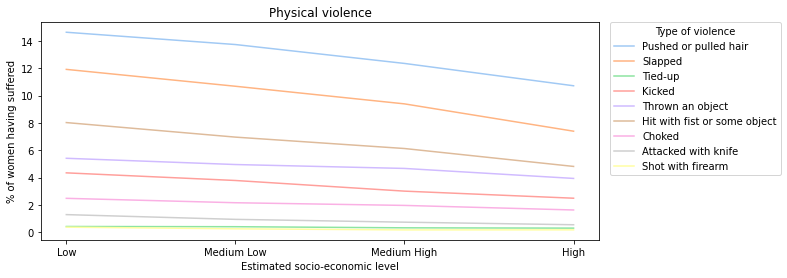

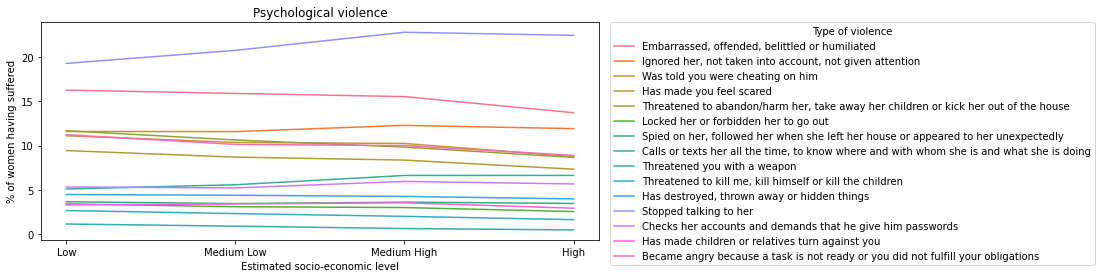

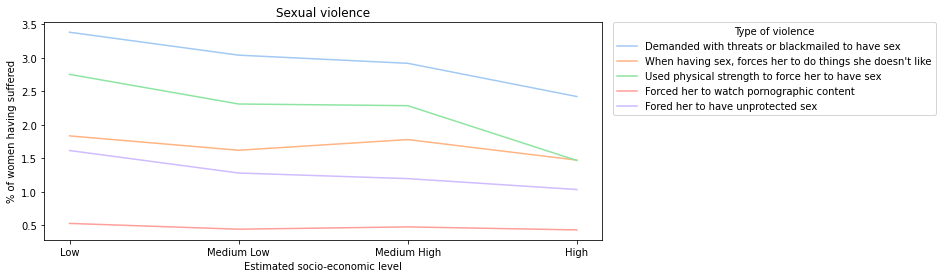

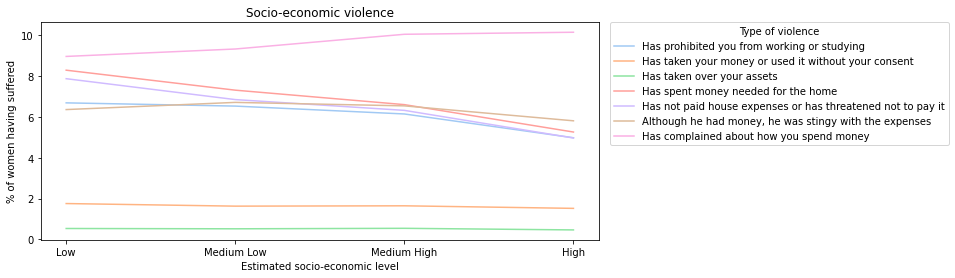

In [ ]:
################ One graph per type of violence
#Group them by income levels
for type in [(phys, phys_lab, "Physical"), (psych, psych_lab, "Psychological"), (sex, sex_lab, "Sexual"), (econ, econ_lab, "Socio-economic")]:
  groupby_temp = data_base[["asset_pca_quant"] + type[0]].groupby("asset_pca_quant").mean()
  groupby_temp["index2"] = groupby_temp.index
  groupby_temp = pd.melt(groupby_temp, id_vars=['index2'], value_vars= type[0])

  #Arrance labels
  for i in range(len(type[1])):
    groupby_temp['variable'][groupby_temp['variable'] == type[0][i]] = type[1][i]

  #Plot
  fig, ax = plt.subplots(figsize=(10,4))
  g = sns.lineplot(data=groupby_temp, x="index2", y="value", hue="variable")
  ax.legend(title="Type of violence", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  ax.set(xlabel = "Estimated socio-economic level", ylabel='% of women having suffered', title = type[2] + ' violence')
  g.set_xticklabels(inc_labels)
  plt.xticks(range(0,4))
  plt.show()


## Violence vs Education

Aggregated violence indicator

In [ ]:
#Group them by education
data_base['NIV'][data_base['NIV'].isin([5, 6, 7, 8, 9])] = '5'
groupby_temp = data_base[['1 - 3', 'More than 3', 'Zero', "NIV"]].groupby("NIV").mean()
groupby_temp["index2"] = groupby_temp.index
groupby_temp = pd.melt(groupby_temp, id_vars=['index2'], value_vars=['1 - 3', 'More than 3', 'Zero'])
educ_labels = ['None', 'Preschool', 'Elementary', 'Jr High', 'HS', 'Associate D', 'B.A.', 'Graduate', 'No answer']

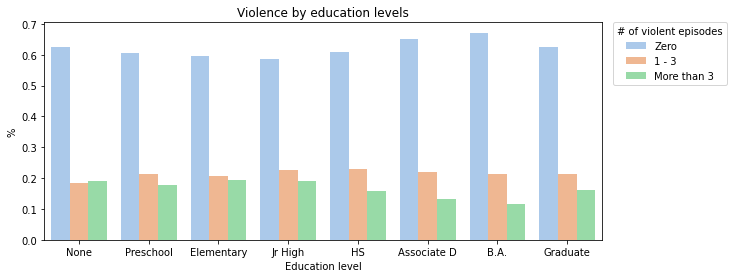

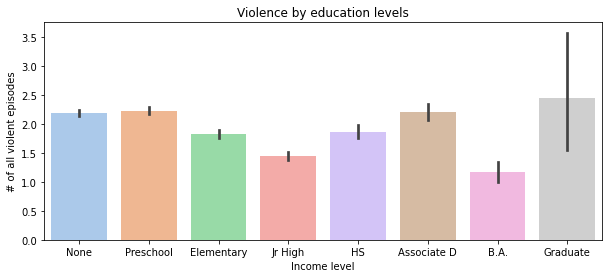

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=groupby_temp, x="index2", y="value", hue="variable", hue_order = ['Zero', '1 - 3', 'More than 3'])
ax.legend(title="# of violent episodes", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(xlabel='Education level', ylabel='%', title = 'Violence by education levels')
g.set_xticklabels(educ_labels)

fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=data_base[data_base['NIV']!=99], x="NIV", y="tot_violent")
ax.set(xlabel='Income level', ylabel='# of all violent episodes', title = 'Violence by education levels')
g.set_xticklabels(educ_labels)
plt.show()

Individual violence indicator

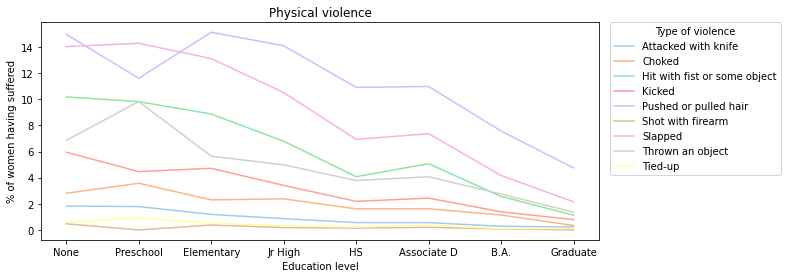

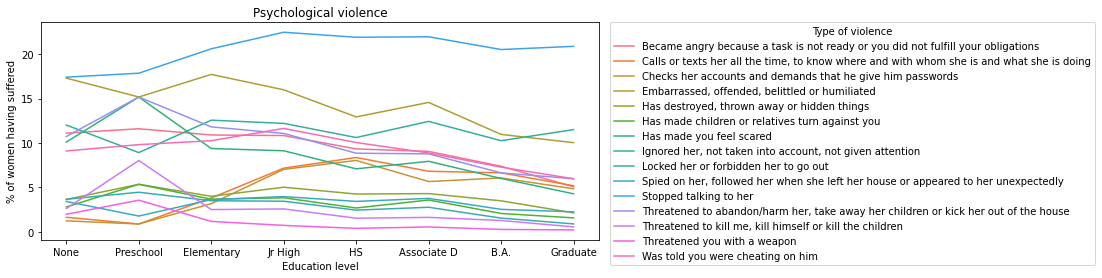

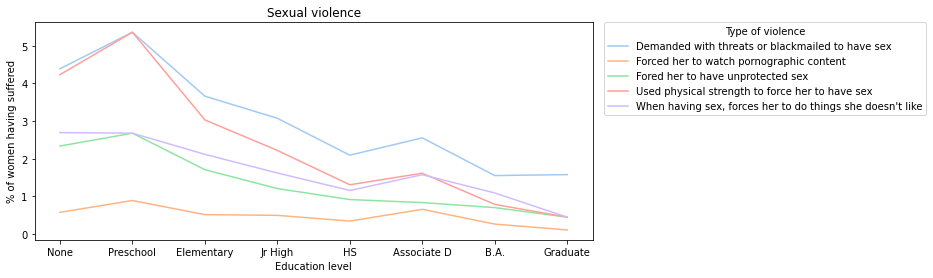

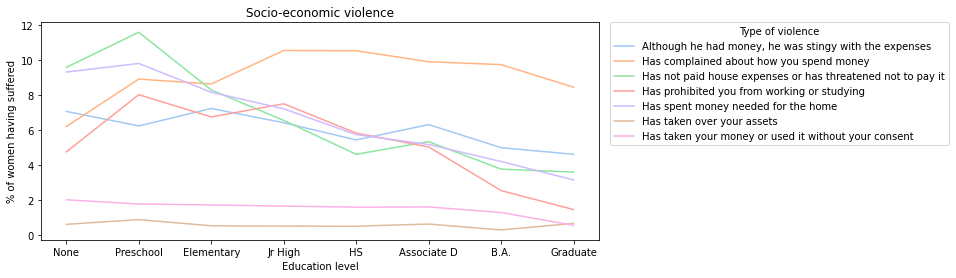

In [ ]:
################ One graph per type of violence
for type in [(phys, phys_lab, "Physical"), (psych, psych_lab, "Psychological"), (sex, sex_lab, "Sexual"), (econ, econ_lab, "Socio-economic")]:
  groupby_temp = data_base[["NIV"] + type[0]].groupby("NIV").mean()
  groupby_temp["index2"] = groupby_temp.index
  groupby_temp = pd.melt(groupby_temp, id_vars=['index2'], value_vars= type[0])

  #Arrance labels
  for i in range(len(type[1])):
    groupby_temp['variable'][groupby_temp['variable'] == type[0][i]] = type[1][i]

  groupby_temp = groupby_temp[groupby_temp['index2']!=99]
  groupby_temp['index2'][groupby_temp['index2'] == 10] = 6
  groupby_temp['index2'][groupby_temp['index2'] == 11] = 7
  groupby_temp['index2'] = groupby_temp['index2'].astype(int)
  groupby_temp.sort_values(['variable', 'index2'], inplace = True)

  #Plot
  fig, ax = plt.subplots(figsize=(10,4))
  g = sns.lineplot(data=groupby_temp, x="index2", y="value", hue="variable")
  ax.legend(title="Type of violence", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  ax.set(xlabel = "Education level", ylabel='% of women having suffered', title = type[2] + ' violence')
  g.set_xticklabels(educ_labels)
  plt.xticks(range(0,8))
  plt.show()

## Violence vs Urb/Rur

In [ ]:
#Group them by urban/rural
groupby_temp = data_base[['1 - 3', 'More than 3', 'Zero', "DOMINIO"]].groupby("DOMINIO").mean()
groupby_temp["index2"] = groupby_temp.index
groupby_temp = pd.melt(groupby_temp, id_vars=['index2'], value_vars=['1 - 3', 'More than 3', 'Zero'])
urbrur_labels = ['Urban', 'Rural', 'Semi-Urban']

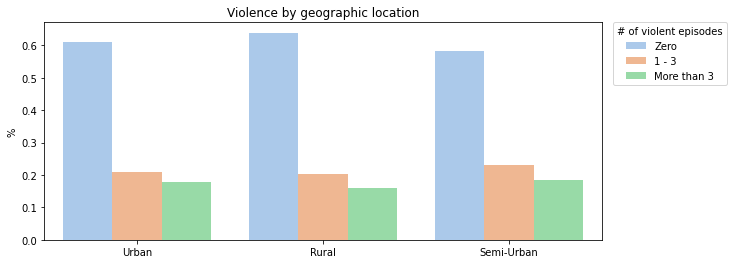

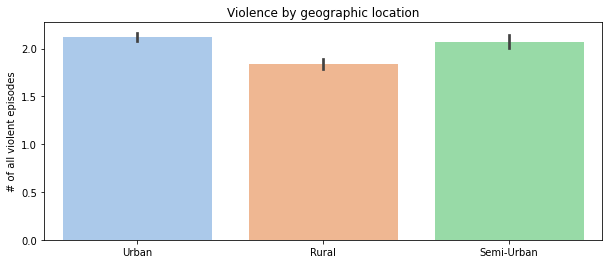

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=groupby_temp, x="index2", y="value", hue="variable", hue_order = ['Zero', '1 - 3', 'More than 3'])
ax.legend(title="# of violent episodes", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(xlabel='', ylabel='%', title = 'Violence by geographic location')
g.set_xticklabels(urbrur_labels)

fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=data_base, x="DOMINIO", y="tot_violent")
ax.set(xlabel='', ylabel='# of all violent episodes', title = 'Violence by geographic location')
g.set_xticklabels(urbrur_labels)
plt.show()

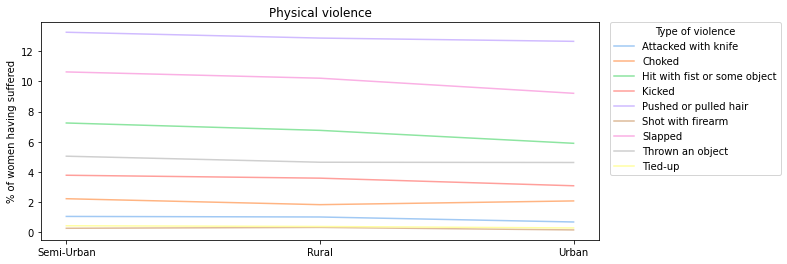

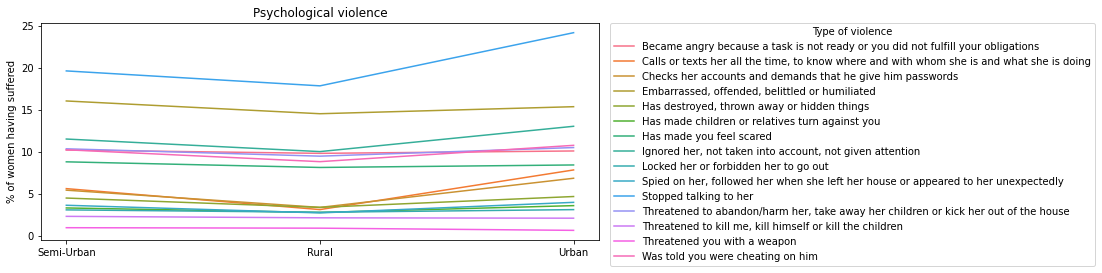

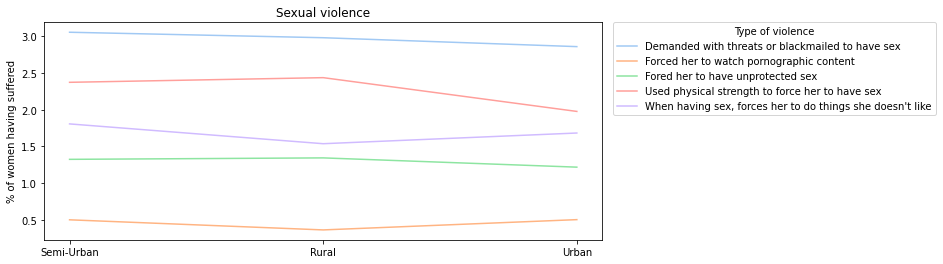

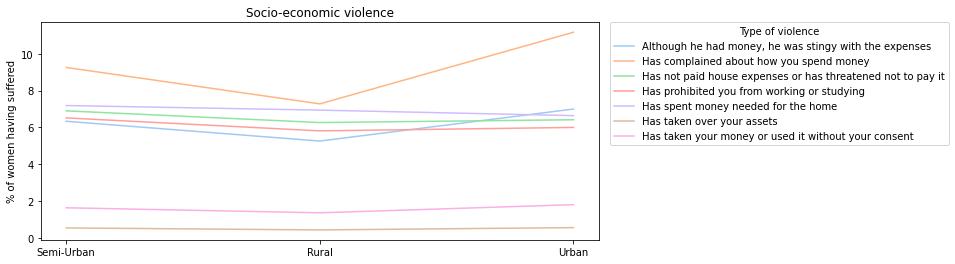

In [ ]:
################ One graph per type of violence
urbrur_labels.reverse()
for type in [(phys, phys_lab, "Physical"), (psych, psych_lab, "Psychological"), (sex, sex_lab, "Sexual"), (econ, econ_lab, "Socio-economic")]:
  groupby_temp = data_base[["DOMINIO"] + type[0]].groupby("DOMINIO").mean()
  groupby_temp["index2"] = groupby_temp.index
  groupby_temp = pd.melt(groupby_temp, id_vars=['index2'], value_vars= type[0])

  #Arrance labels
  for i in range(len(type[1])):
    groupby_temp['variable'][groupby_temp['variable'] == type[0][i]] = type[1][i]

  groupby_temp['index2'], labels = pd.factorize(groupby_temp['index2'])
  groupby_temp.sort_values(['variable', 'index2'], inplace = True)
  
  #Plot
  fig, ax = plt.subplots(figsize=(10,4))
  g = sns.lineplot(data=groupby_temp, x="index2", y="value", hue="variable")
  ax.legend(title="Type of violence", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  ax.set(xlabel = "", ylabel='% of women having suffered', title = type[2] + ' violence')
  g.set_xticklabels(urbrur_labels)
  plt.xticks(range(0,3))
  plt.show()

## Violence vs Employment

In [ ]:
#Group them by urban/rural
data_base["P2_13"] = data_base["ocup_simple_m"].replace([2,3,4,5,6], 1)
groupby_temp = data_base[['1 - 3', 'More than 3', 'Zero', "P2_13"]].groupby("P2_13").mean()
groupby_temp["index2"] = groupby_temp.index
groupby_temp = pd.melt(groupby_temp, id_vars=['index2'], value_vars=['1 - 3', 'More than 3', 'Zero'])

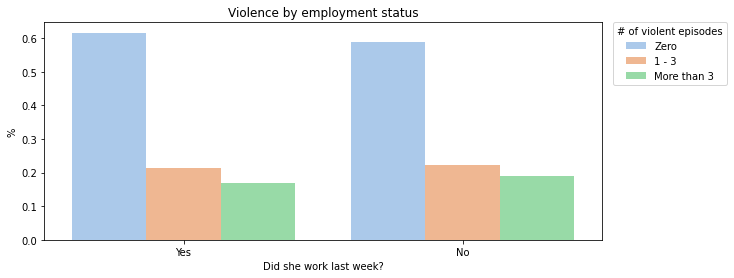

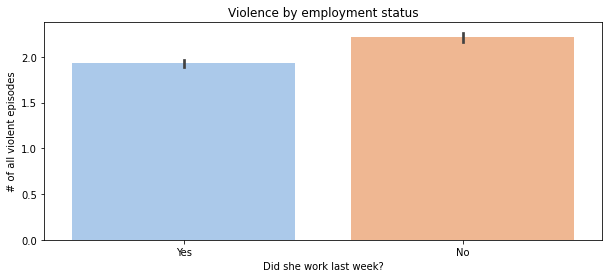

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=groupby_temp, x="index2", y="value", hue="variable", hue_order = ['Zero', '1 - 3', 'More than 3'])
ax.legend(title="# of violent episodes", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(xlabel='Did she work last week?', ylabel='%', title = 'Violence by employment status')
g.set_xticklabels(['Yes', 'No', 'No answer'])
plt.show()

fig, ax = plt.subplots(figsize=(10,4))
g = sns.barplot(data=data_base, x="P2_13", y="tot_violent")
ax.set(xlabel='Did she work last week?', ylabel='# of all violent episodes', title = 'Violence by employment status')
g.set_xticklabels(['Yes', 'No', 'No answer'])
plt.show()

## Geographic Heterogeneity

In [ ]:
#Import Mexico's states shapefile
ent_geo = gpd.read_file(GIS + "/00ent.shp")
ent_geo['CVE_ENT'] = pd.to_numeric(ent_geo['CVE_ENT']) 
#Summarize the data at the state level
groupby_temp = data_base[['1 - 3', 'More than 3', 'Zero', "tot_violent", "CVE_ENT"]].groupby("CVE_ENT").mean()
ent_geo = ent_geo.merge(groupby_temp, on="CVE_ENT")
ent_geo['Any'] = (ent_geo['1 - 3'] + ent_geo['More than 3'])*100

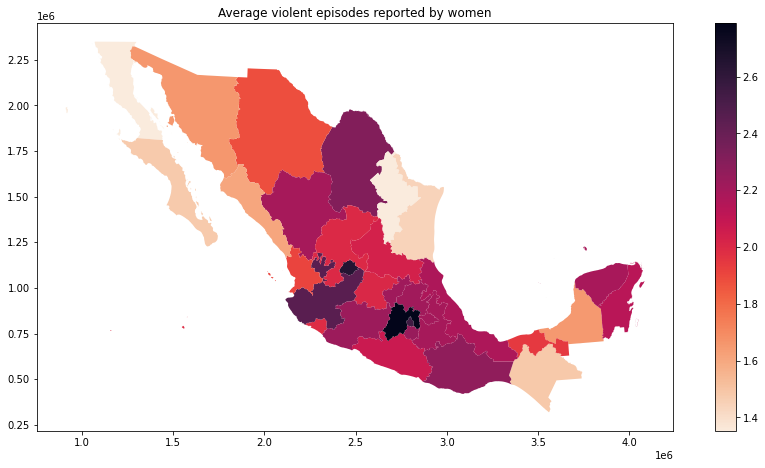

In [ ]:
ent_geo.plot(column = 'tot_violent', legend = True, cmap = 'rocket_r', figsize=(15, 7.5))
plt.title("Average violent episodes reported by women")
plt.show()

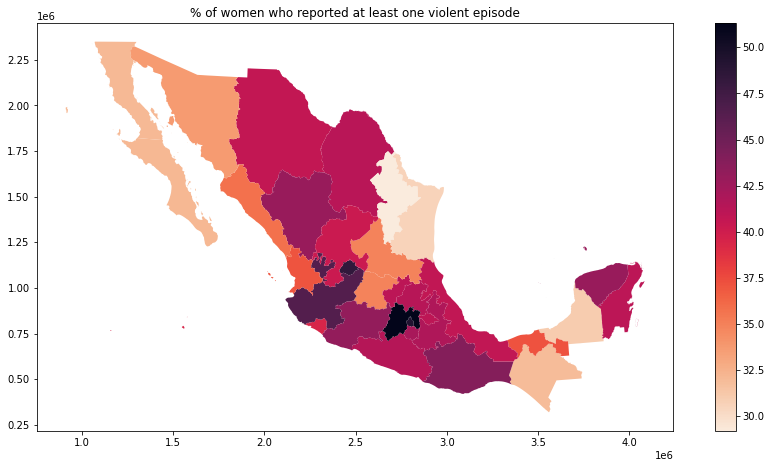

In [ ]:
ent_geo.plot(column = 'Any', legend = True, cmap = 'rocket_r', figsize=(15, 7.5))
plt.title("% of women who reported at least one violent episode")
plt.show()

# Violence by income

In [ ]:
#Violence and income
income_analysis = data_base[data_base['tot_violent'] > 0].reset_index()
violence_vars = data_base.filter(['P13_1_1','P13_1_2','P13_1_3','P13_1_4','P13_1_5','P13_1_6','P13_1_7','P13_1_8', 'P13_1_9'] , axis=1)

total_violent_events_3 = [0]*len(income_analysis)
total_violent_events_2 = [0]*len(income_analysis)
total_violent_events_1 = [0]*len(income_analysis)
total_violent_events_4 = [0]*len(income_analysis)

#Esto no esta bien contado, deberia contar el mas alto para cada mujer creo
for col in violence_vars.columns:
    for i in income_analysis.index:
       # print('col is', col, 'i is', i)
        if income_analysis[col][i] == 1:  
            total_violent_events_1[i] += 1 
        elif income_analysis[col][i] == 2:  
            total_violent_events_2[i] += 1 
        elif income_analysis[col][i] == 3:  
            total_violent_events_3[i] += 1
        elif income_analysis[col][i] == 4:  
            total_violent_events_4[i] += 1
            
income_analysis['many_times'] = total_violent_events_1   
income_analysis['few_times'] = total_violent_events_2
income_analysis['one_times'] = total_violent_events_3
income_analysis['never'] = total_violent_events_4

income_analysis = income_analysis.groupby(["ESTRATO"]).sum()
income_analysis[['many_times', 'few_times', 'one_times', 'never']] = income_analysis[['many_times', 'few_times', 'one_times', 'never']].apply(lambda x:(x/x.sum()*100), axis=1)
income_analysis = income_analysis[['many_times', 'few_times', 'one_times', 'never']]


income_analysis.head()

,many_times,few_times,one_times,never
ESTRATO,,,,
1,3.402232,5.892285,4.205725,86.499757
2,2.815152,5.483839,3.880616,87.820393
3,1.731020,4.227761,3.372434,90.668785
4,1.030313,3.210238,2.581205,93.178244


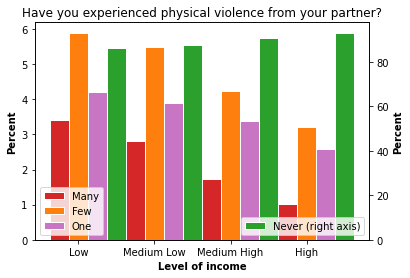

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = income_analysis['many_times'].to_list()
bars2 = income_analysis['few_times'].to_list()
bars3 = income_analysis['one_times'].to_list()
bars4 = income_analysis['never'].to_list()
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#8c564b
#1f77b4
# Make the plot
plt.bar(r1, bars1, color='#d62728', width=barWidth, edgecolor='white', label='many_times')
plt.bar(r2, bars2, color='#ff7f0e', width=barWidth, edgecolor='white', label='few_times')
plt.bar(r3, bars3, color='#c875c4', width=barWidth, edgecolor='white', label='one_times')
plt.legend(['Many', 'Few', 'One'], loc='lower left')
plt.ylabel('Percent', fontweight='bold')
plt.xlabel('Level of income', fontweight='bold')
plt.title('Have you experienced physical violence from your partner?')

#secondary axis
plt.twinx()
plt.bar(r4, bars4, color='#2ca02c', width=barWidth, edgecolor='white', label='one_times')

# Add xticks
plt.xlabel('Level of income', fontweight='bold')
plt.ylabel('Percent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Low', 'Medium Low', 'Medium High', 'High'])
 
# Create legend & Show graphic
plt.legend(['Never (right axis)'], loc='lower right')
plt.show()



## **Exploring target variable by socioeconomic characteristics**

In [ ]:
#violence education level
ed_v = data_base[['NIV', 'P13_1_1']]
ed_v['n_niv'] = ed_v['NIV']
mask = ed_v['n_niv'].isin([5, 6, 7, 8, 9])
ed_v['n_niv'] = ed_v[['n_niv']].where(~mask, other=5)
ed_v = ed_v.groupby(['n_niv', 'P13_1_1']).size().reset_index(name='counts')

percents = []
for i in ed_v['n_niv'].unique().tolist():
    sum_tot = ed_v[ed_v['n_niv'] == i]['counts'].sum()
    percent = (ed_v[ed_v['n_niv'] == i]['counts'] / sum_tot).to_list()
    percents.extend(percent)
ed_v['n_niv'] = ed_v['n_niv'].astype('string')
ed_v['percent'] = percents
ed_violence = ed_v[ed_v['P13_1_1'] != 4]

In [ ]:
ed_violence

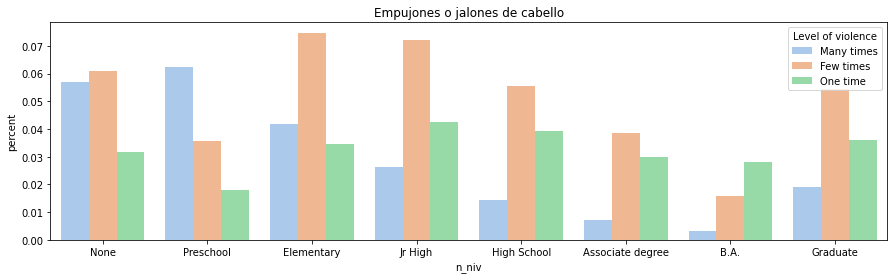

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
labels = ['Many times', 'Few times', 'One time', 'Never', 'No answer']
g = sns.barplot(ax=ax, data=ed_violence,
    x="n_niv", y="percent", hue="P13_1_1")
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Level of violence")
ax.set_title('Empujones o jalones de cabello')
g.set_xticklabels(['None', 'Preschool', 'Elementary', 'Jr High', 'High School', 'Associate degree', 'B.A.', 'Graduate', 'No answer'])
plt.show()
None

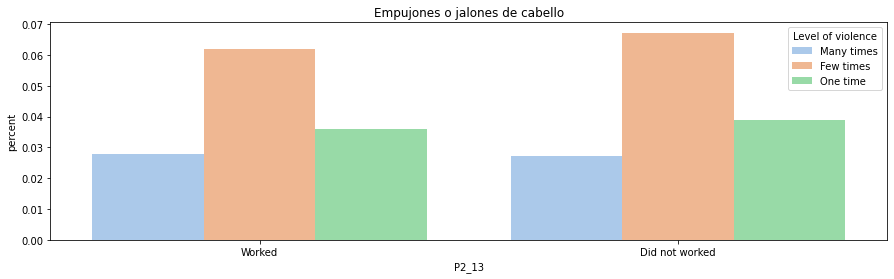

In [ ]:
#violence per employment
emp_v = data_base[['P2_13', 'P13_1_1']]
emp_v = emp_v.groupby(['P2_13', 'P13_1_1']).size().reset_index(name='counts')
percents = []
for i in emp_v['P2_13'].unique().tolist():
    sum_tot = emp_v[emp_v['P2_13'] == i]['counts'].sum()
    percent = (emp_v[emp_v['P2_13'] == i]['counts'] / sum_tot).to_list()
    percents.extend(percent)
emp_v['percent'] = percents
emp_v = emp_v[emp_v['P13_1_1'] != 4]
fig, ax = plt.subplots(figsize=(15,4))
g = sns.barplot(ax=ax, data=emp_v,
    x="P2_13", y="percent", hue="P13_1_1")
g.set_xticklabels(['Worked', 'Did not worked'])
labels = ['Many times', 'Few times', 'One time', 'Never', 'No answer']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Level of violence")
ax.set_title('Empujones o jalones de cabello')
plt.show()
None

# Pre-processing

In [ ]:

#Creating polynomial features
def poly_features(X, y, threshold=0.5):
  '''
  Creates square or interaction features to input the model
  if the correlation of the interaction is higher than the feature alone
  and/or above a certain threshold, respectively.
  Input:
    - X: feature dataframe
    - y: target series
  Output:
    - poly_features dataframe containing polynomial features
  '''
  poly_features = pd.DataFrame()
  columns = X.columns
  #Interaction
  for i, var1 in enumerate(columns):
    for var2 in columns[i+1:]:
      print('Var 1 is', var1, 'var2 is', var2)
      interaction = str(var1) + '_' + str(var2)
      X[interaction] = X[var1] * X[var2]
      if abs(X[interaction].corr(y)) > threshold:
        print('classifies')
        poly_features[interaction] = X[interaction]
  print('out of first loop')
    #Squared
  for var in columns:
    print('var sq', var)
    sq = var+'_sq'
    X[sq] = X[var] * X[var] 
    print('Correlation is', X[interaction].corr(y) )
    if abs(X[sq].corr(y)) > threshold and \
        abs(X[sq].corr(y)) > abs(X[var].corr(y)):  
      print('classifies')
      poly_features[sq] = X[sq]

  return poly_features


In [ ]:
subset["tot_violent_many_phys"].corr(subset['asset_2'])

-0.017211745714170053

In [ ]:
poly_features(subset[['GRA', 'ing_mens_m']], subset["tot_violent_many"], 0.5)

Var 1 is GRA var2 is ing_mens_m
out of first loop
var sq GRA
Correlation is -0.00987552896024977
var sq ing_mens_m
Correlation is -0.00987552896024977


""
